# Accounting for seasonality

## Examining the SARIMA(p,d,q)(P,D,Q)m model

#### The SARIMA(p,d,q)(P,D,Q)m model expands on the ARIMA(p,d,q) model from the previous chapter by adding seasonal parameters. You’ll notice four new parameters in the model: P, D, Q, and m. The first three have the same meaning as in the ARIMA(p,d,q) model, but they are their seasonal counterparts. To understand the meaning of these parameters and how they affect the final model, we must first define m.

#### The parameter m stands for the frequency. In the context of a time series, the frequency is defined as the number of observations per cycle. The length of the cycle will depend on the dataset. For data that was recorded every year, quarter, month, or week, the length of a cycle is considered to be 1 year. If the data was recorded annually, m = 1 since there is only one observation per year. If the data was recorded quarterly, m = 4 since there are four quarters in a year, and therefore four observations per year. Of course, if the data was recorded monthly, m = 12. Finally, for weekly data, m = 52. Table 8.1 indicates the appropriate value of m depending on the frequency at which the data was collected.



#### When data is collected on a daily or sub-daily basis, there are multiple ways of interpreting the frequency. For example, daily data can have a weekly seasonality. In that case, the frequency is m = 7 because there would be seven observations in a full cycle of 1 week. It could also have a yearly seasonality, meaning that m = 365. Thus, you can see that daily and sub-daily data can have a different cycle length, and therefore a different frequency m. Table 8.2 provides the appropriate value of m depending on the seasonal cycle for daily and sub-daily data.

#### Note that a SARIMA(p,d,q)(0,0,0)m model is equivalent to an ARIMA(p,d,q) model.

#### Let’s consider an example where m = 12. If P = 2, this means that we are including two past values of the series at a lag that is a multiple of m. Therefore, we’ll include the values at yt–12 and yt–24.

#### Similarly, if D = 1, this means that a seasonal difference makes the series stationary. In this case, a seasonal difference would be expressed as equation 8.1.

#### y't = yt– yt–12

## Identifying seasonal patterns in a time series

## Time series decomposition

- Time series decomposition is a statistical task that separates the time series into its three main components: a trend component, a seasonal component, and the residuals.

#### The trend component represents the long-term change in the time series. This component is responsible for time series that increase or decrease over time. The seasonal component is the periodic pattern in the time series. It represents repeated fluctuations that occur over a fixed period of time. Finally, the residuals, or the noise, express any irregularity that cannot be explained by the trend or the seasonal component.

In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('/Users/maukanmir/Documents/Machine-Learning/AI-ML-Textbooks/AI-ML-Learning/Data/air_passengers.csv')
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


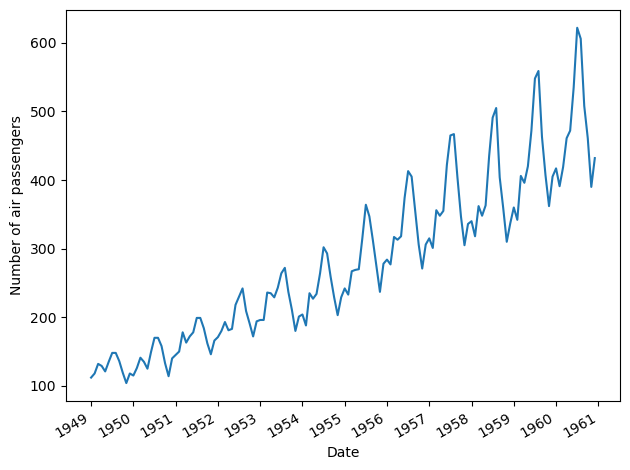

In [3]:
fig, ax = plt.subplots()

ax.plot(df['Month'], df['Passengers'])
ax.set_xlabel('Date')
ax.set_ylabel('Number of air passengers')

plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))

fig.autofmt_xdate()
plt.tight_layout()

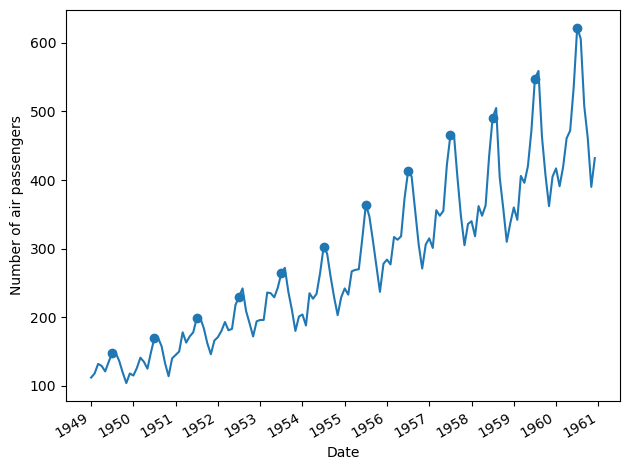

In [4]:
fig, ax = plt.subplots()

ax.plot(df['Month'], df['Passengers'], markevery=np.arange(6, 145, 12), marker='o')
ax.set_xlabel('Date')
ax.set_ylabel('Number of air passengers')

plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))

fig.autofmt_xdate()
plt.tight_layout()

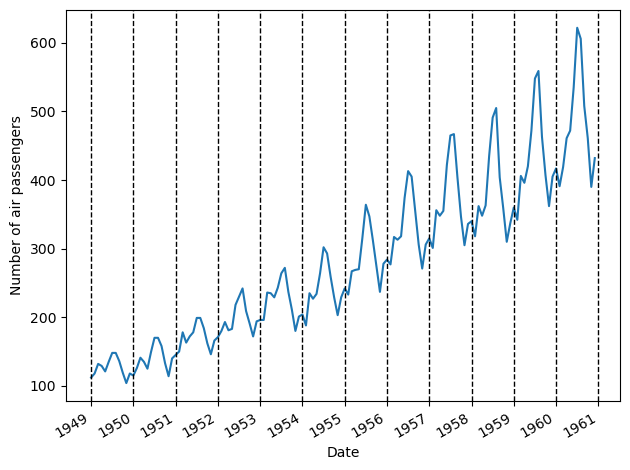

In [5]:
fig, ax = plt.subplots()

ax.plot(df['Month'], df['Passengers'])
for i in np.arange(0, 145, 12):
    ax.axvline(x=i, linestyle='--', color='black', linewidth=1)
ax.set_xlabel('Date')
ax.set_ylabel('Number of air passengers')

plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))

fig.autofmt_xdate()
plt.tight_layout()


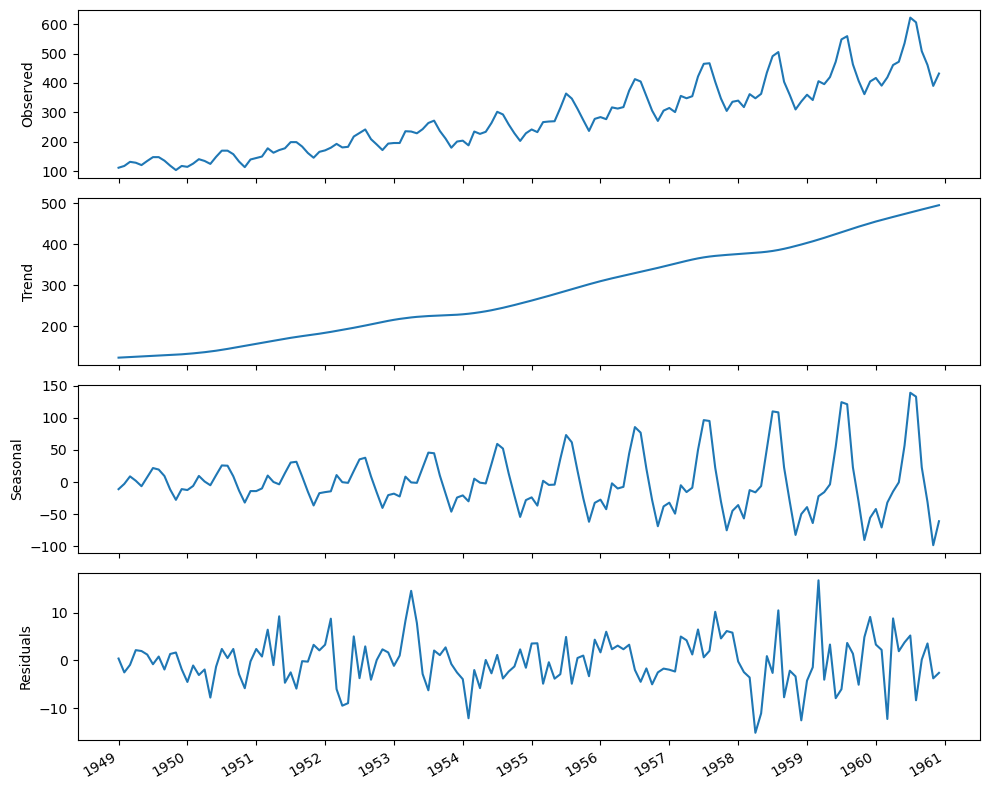

In [6]:
decomposition = STL(df['Passengers'], period=12).fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10,8))

ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(decomposition.resid)
ax4.set_ylabel('Residuals')

plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))

fig.autofmt_xdate()
plt.tight_layout()

#### In figure 8.4 you can see each component of our time series. You’ll notice that the y-axis for the plots of the trend, seasonal, and residuals components are all slightly different from the observed data. This is because each plot shows the magnitude of change that is attributed to that particular component. That way, the sum of the trend, seasonal, and residuals components results in the observed data shown in the top plot. This explains why the seasonal component is sometimes in the negative values and other times in the positive values, as it creates the peaks and troughs in the observed data.

#### In a situation where we have a time series with no seasonal pattern, the decomposition process will display a flat horizontal line at 0 for the seasonal component. To demonstrate that, I simulated a linear time series and decomposed it into its three components using the method you just saw. The result is shown in figure 8.5.

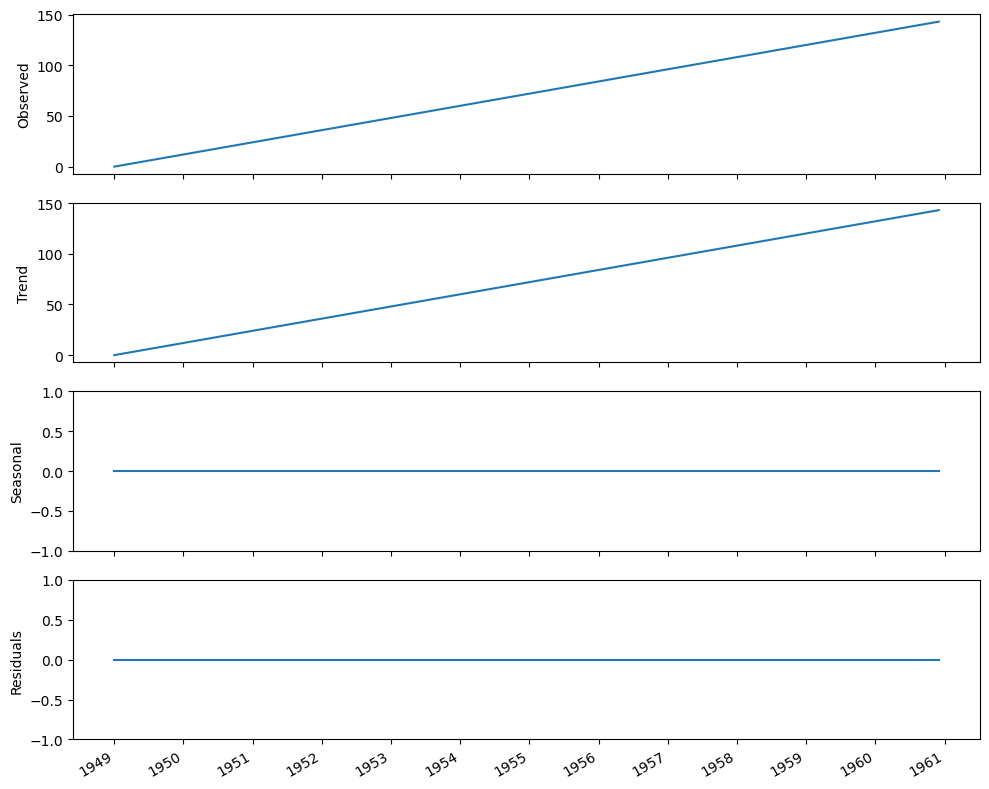

In [7]:
linear_ts = np.arange(0, 144, 1)

decomposition = STL(linear_ts, period=12).fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10,8))

ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')
ax3.set_ylim(-1, 1)

ax4.plot(decomposition.resid)
ax4.set_ylabel('Residuals')
ax4.set_ylim(-1, 1)

plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))

fig.autofmt_xdate()
plt.tight_layout()

#### You can see how time series decomposition can help us determine if our data is seasonal or not. This is a graphical method and not a statistical test, but it is enough to determine whether a series is seasonal or not, so that we can apply the appropriate model for forecasting. In fact, there are no statistical tests to identify seasonality in time series.

![Sample Image](/Users/maukanmir/Documents/Machine-Learning/AI-ML-Textbooks/AI-ML-Learning/images/sarima2.png)

#### With our new modeling procedure defined, we are now ready to forecast the total number of monthly air passengers. For this scenario, we wish to forecast 1 year of monthly air passengers, so we will use the data from 1960 as the test set, as shown in figure 8.8.

In [8]:
ad_fuller_result = adfuller(df['Passengers'])
 
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: 0.8153688792060527
p-value: 0.991880243437641


In [9]:
df_diff = np.diff(df['Passengers'], n=1)
 
ad_fuller_result = adfuller(df_diff)
 
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -2.8292668241699865
p-value: 0.054213290283827265


In [10]:
df_diff2 = np.diff(df_diff, n=1)
 
ad_fuller_result = adfuller(df_diff2)
 
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -16.384231542468473
p-value: 2.732891850014397e-29


#### Series is now differenced twice

In [11]:
ps = range(0, 13, 1)
qs = range(0, 13, 1)
Ps = [0]
Qs = [0]
 
d = 2
D = 0
s = 12
 
ARIMA_order_list = list(product(ps, qs, Ps, Qs)) 

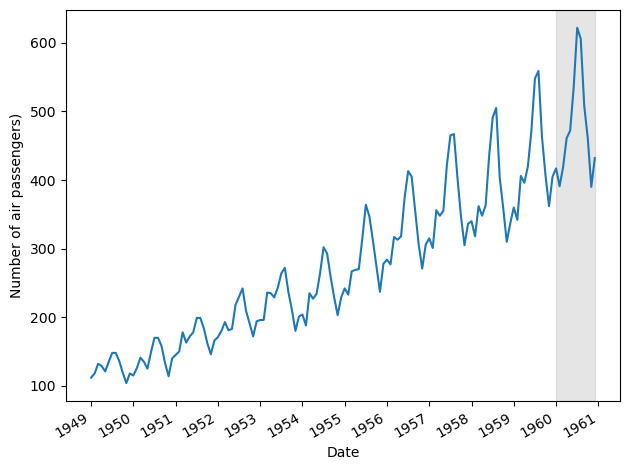

In [12]:
fig, ax = plt.subplots()

ax.plot(df['Month'], df['Passengers'])
ax.set_xlabel('Date')
ax.set_ylabel('Number of air passengers)')
ax.axvspan(132, 143, color='#808080', alpha=0.2)

plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))

fig.autofmt_xdate()
plt.tight_layout()

In [13]:
def optimize_ARIMA(endog: Union[pd.Series, list], order_list: list, d: int) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(endog, order=(order[0], d, order[1]), simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [14]:
def optimize_SARIMA(endog: Union[pd.Series, list], order_list: list, d: int, D: int, s: int) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(
                endog, 
                order=(order[0], d, order[1]),
                seasonal_order=(order[2], D, order[3], s),
                simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,P,Q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [15]:
ps = range(0, 13, 1)
qs = range(0, 13, 1)
Ps = [0]
Qs = [0]

d = 2
D = 0
s = 12

ARIMA_order_list = list(product(ps, qs, Ps, Qs))

train = df['Passengers'][:-12]

ARIMA_result_df = optimize_SARIMA(train, ARIMA_order_list, d, D, s)
ARIMA_result_df

  0%|          | 0/169 [00:00<?, ?it/s]

,"(p,q,P,Q)",AIC
0,"(11, 3, 0, 0)",1016.838606
1,"(11, 4, 0, 0)",1019.018751
2,"(11, 5, 0, 0)",1020.378645
3,"(11, 1, 0, 0)",1021.030838
4,"(12, 0, 0, 0)",1021.210313
...,...,...
164,"(5, 0, 0, 0)",1281.732157
165,"(3, 0, 0, 0)",1300.282335
166,"(2, 0, 0, 0)",1302.913196
167,"(1, 0, 0, 0)",1308.152194


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  132
Model:              SARIMAX(11, 2, 3)   Log Likelihood                -493.419
Date:                Fri, 19 Jul 2024   AIC                           1016.839
Time:                        19:14:16   BIC                           1059.852
Sample:                             0   HQIC                          1034.316
                                - 132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8238      0.100     -8.216      0.000      -1.020      -0.627
ar.L2         -0.9631      0.049    -19.750      0.000      -1.059      -0.867
ar.L3         -0.8520      0.087     -9.748      0.0

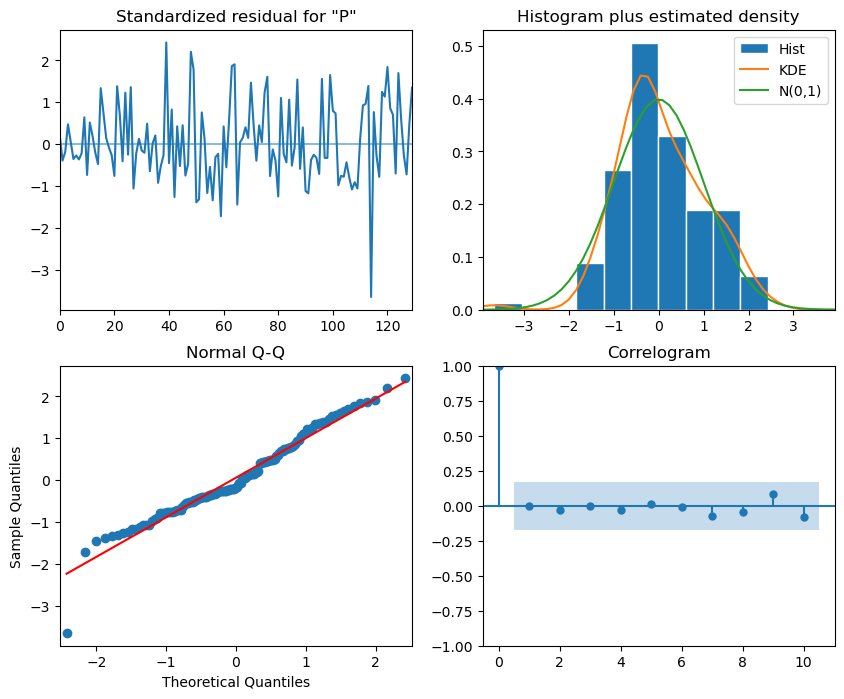

In [17]:
ARIMA_model = SARIMAX(train, order=(11,2,3), simple_differencing=False)
ARIMA_model_fit = ARIMA_model.fit(disp=False)

print(ARIMA_model_fit.summary())


ARIMA_model_fit.plot_diagnostics(figsize=(10,8));

In [16]:
ps = range(0, 4, 1)
qs = range(0, 4, 1)
Ps = range(0, 4, 1)
Qs = range(0, 4, 1)

SARIMA_order_list = list(product(ps, qs, Ps, Qs))

train = df['Passengers'][:-12]

d = 1
D = 1
s = 12

SARIMA_result_df = optimize_SARIMA(train, SARIMA_order_list, d, D, s)
SARIMA_result_df

  0%|          | 0/256 [00:00<?, ?it/s]

,"(p,q,P,Q)",AIC
0,"(2, 1, 1, 2)",892.252370
1,"(2, 1, 1, 3)",894.105183
2,"(2, 1, 2, 1)",894.220109
3,"(1, 0, 1, 2)",894.287083
4,"(3, 2, 2, 3)",894.706507
...,...,...
250,"(0, 0, 2, 0)",906.940147
251,"(3, 2, 0, 3)",907.181875
252,"(0, 0, 3, 2)",907.469964
253,"(0, 0, 3, 0)",908.742583


In [18]:
test = df.iloc[-12:]

test['naive_seasonal'] = df['Passengers'].iloc[120:132].values
test

,Month,Passengers,naive_seasonal
132,1960-01,417,360
133,1960-02,391,342
134,1960-03,419,406
135,1960-04,461,396
136,1960-05,472,420
137,1960-06,535,472
138,1960-07,622,548
139,1960-08,606,559
140,1960-09,508,463
141,1960-10,461,407


In [19]:
ARIMA_pred = ARIMA_model_fit.get_prediction(132, 143).predicted_mean
 
test['ARIMA_pred'] = ARIMA_pred      

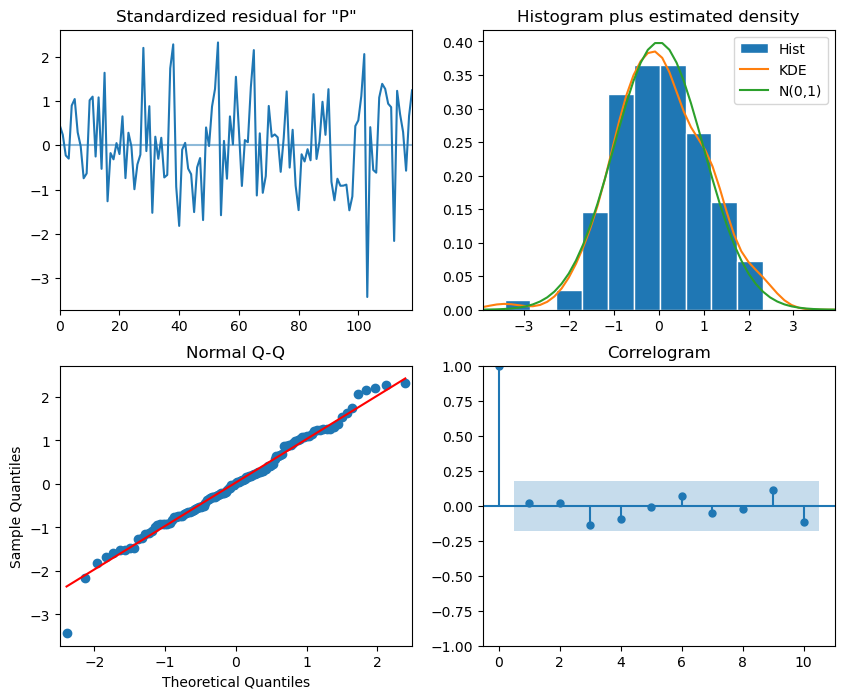

In [20]:
SARIMA_model = SARIMAX(train, order=(2,1,1), seasonal_order=(1,1,2,12), simple_differencing=False)
SARIMA_model_fit = SARIMA_model.fit(disp=False)
 
SARIMA_model_fit.plot_diagnostics(figsize=(10,8));

In [21]:
SARIMA_pred = SARIMA_model_fit.get_prediction(132, 143).predicted_mean
 
test['SARIMA_pred'] = SARIMA_pred

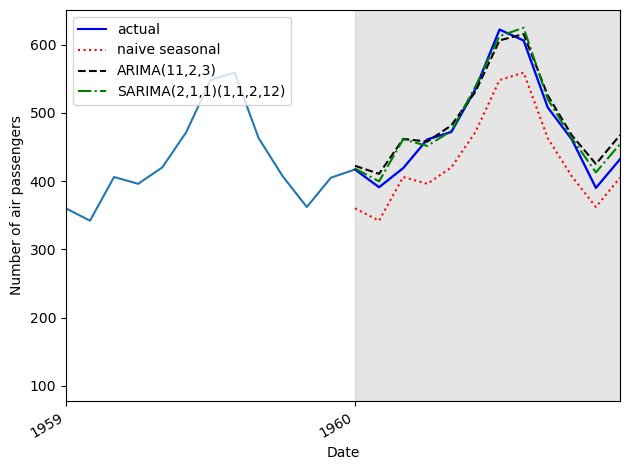

In [22]:
fig, ax = plt.subplots()
 
ax.plot(df['Month'], df['Passengers'])
ax.plot(test['Passengers'], 'b-', label='actual')
ax.plot(test['naive_seasonal'], 'r:', label='naive seasonal')
ax.plot(test['ARIMA_pred'], 'k--', label='ARIMA(11,2,3)')
ax.plot(test['SARIMA_pred'], 'g-.', label='SARIMA(2,1,1)(1,1,2,12)')
 
ax.set_xlabel('Date')
ax.set_ylabel('Number of air passengers')
ax.axvspan(132, 143, color='#808080', alpha=0.2)
 
ax.legend(loc=2)
 
plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))
ax.set_xlim(120, 143)
 
fig.autofmt_xdate()
plt.tight_layout()

In [24]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_naive_seasonal = mape(test['Passengers'], test['naive_seasonal'])
mape_ARIMA = mape(test['Passengers'], test['ARIMA_pred'])
mape_SARIMA = mape(test['Passengers'], test['SARIMA_pred'])

print(mape_naive_seasonal, mape_ARIMA, mape_SARIMA)

9.987532920823485 3.8409893218512856 2.850007506047744


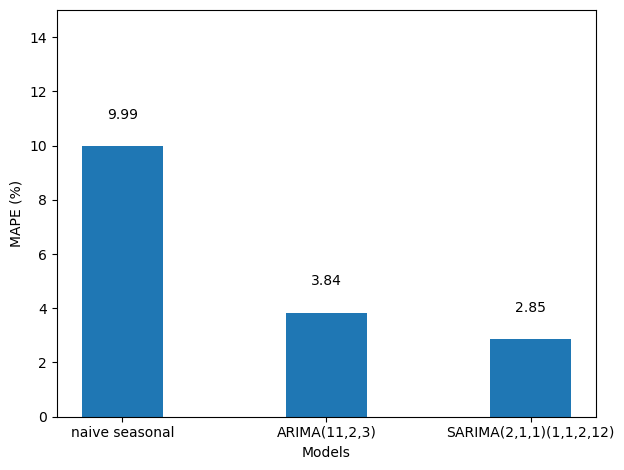

In [25]:
fig, ax = plt.subplots()

x = ['naive seasonal', 'ARIMA(11,2,3)', 'SARIMA(2,1,1)(1,1,2,12)']
y = [mape_naive_seasonal, mape_ARIMA, mape_SARIMA]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 15)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(round(value,2)), ha='center')

plt.tight_layout()

## Summary

- The seasonal autoregressive integrated moving average model, denoted as SARIMA(p,d,q)(P,D,Q)m, adds seasonal properties to the ARIMA(p,d,q) model.
- P is the order of the seasonal autoregressive process, D is the order of seasonal integration, Q is the order of the seasonal moving average process, and m is the frequency of the data.
- The frequency m corresponds to the number of observations in a cycle. If the data is collected every month, then m = 12. If data is collected every quarter, then m = 4.
- Time series decomposition can be used to identify seasonal patterns in a time series.